# Video: Matrix Multiplication in Neural Networks

This video explains the role of matrix multiplication, a fundamental operation in linear algebra, in neural network implementations.
Matrix multiplication plays a key part in the evaluation of neural networks, and in understanding how they work.

## Neural Networks Introduction


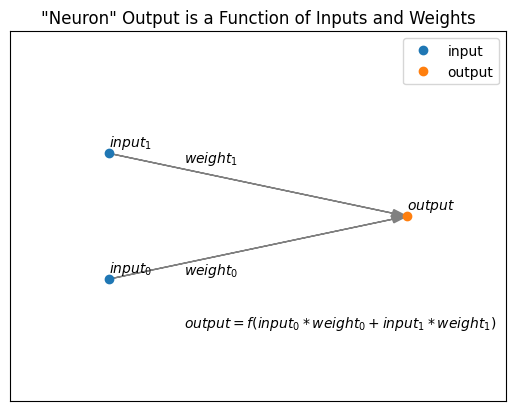

In [ ]:
import matplotlib.pyplot as plt

def plot_nodes(x, ys, label, name_format=None):
    plt.plot([x for _ in ys], ys, label=label, linestyle="none", marker="o")

    if name_format:
        for (i, y) in enumerate(ys):
            plt.annotate(name_format.format(i), (x, y + 2))

def connect(x1, y1, x2, y2, label=None):
    plt.arrow(x1, y1, x2-x1, y2-y1,
              color="grey",
              head_width=2.0,
              length_includes_head=True)

    if label:
        x_mid = x1 + (x2 - x1) / 4
        y_mid = y1 + (y2 - y1) / 4
        plt.annotate(label, (x_mid, y_mid + (2 if y2 < y1 else -3)))

def finish_network():
    plt.gca().set_xlim(0, 100)
    plt.gca().set_ylim(0, 100)
    plt.gca().xaxis.set_visible(False)
    plt.gca().yaxis.set_visible(False)
    plt.legend()

input_x = 20
input_ys = [33, 67]
output_x = 80
output_y = 50

plot_nodes(input_x, input_ys, "input", "$input_{0}$")
plot_nodes(output_x, [output_y], "output", "$output$")

for (i, input_y) in enumerate(input_ys):
    connect(input_x, input_y, output_x, output_y, label=f"$weight_{i}$")

plt.title('"Neuron" Output is a Function of Inputs and Weights')
plt.annotate("$output = f(input_0 * weight_0 + input_1 * weight_1)$", (35, 20))
finish_network()

## Neural Networks in General


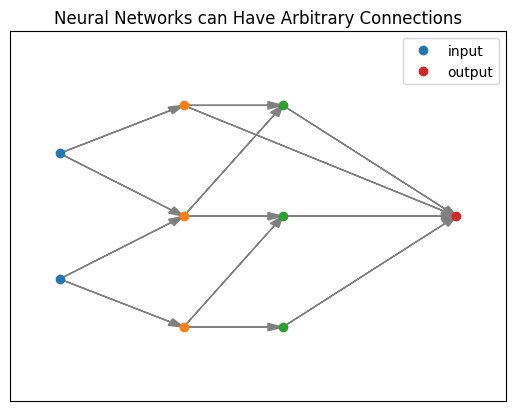

In [ ]:
input_x = 10
input_ys = [33, 67]

hidden_xs = [35, 55]
hidden_ys = [20, 50, 80]

output_x = 90
output_y = 50

plot_nodes(input_x, input_ys, "input")
for hidden_x in hidden_xs:
    plot_nodes(hidden_x, hidden_ys, "")
plot_nodes(output_x, [output_y], "output")

connect(input_x, input_ys[0], hidden_xs[0], hidden_ys[0])
connect(input_x, input_ys[0], hidden_xs[0], hidden_ys[1])
connect(input_x, input_ys[1], hidden_xs[0], hidden_ys[1])
connect(input_x, input_ys[1], hidden_xs[0], hidden_ys[2])
connect(hidden_xs[0], hidden_ys[0], hidden_xs[1], hidden_ys[0])
connect(hidden_xs[0], hidden_ys[0], hidden_xs[1], hidden_ys[1])
connect(hidden_xs[0], hidden_ys[1], hidden_xs[1], hidden_ys[1])
connect(hidden_xs[0], hidden_ys[1], hidden_xs[1], hidden_ys[2])
connect(hidden_xs[0], hidden_ys[2], hidden_xs[1], hidden_ys[2])
connect(hidden_xs[0], hidden_ys[2], output_x, output_y)

for hidden_y in hidden_ys:
    connect(hidden_xs[-1], hidden_y, output_x, output_y)

plt.title("Neural Networks can Have Arbitrary Connections")
finish_network()

## Neural Networks in Practice


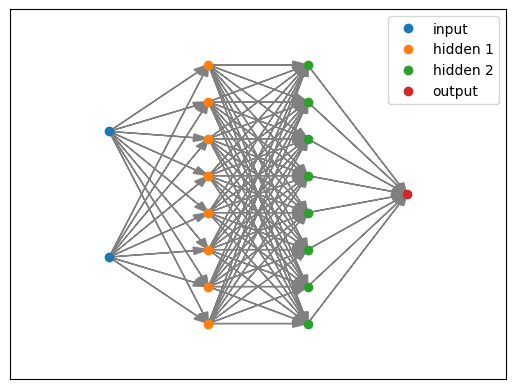

In [ ]:
def plot_fully_connected(x1, y1s, x2, y2s, label_format=None):
    for (i, y1) in enumerate(y1s):
        for (j, y2) in enumerate(y2s):
            connect(x1, y1, x2, y2,
                    label=label_format.format(i, j) if label_format else None)

input_x = 20
hidden_xs = [40, 60]
output_x = 80

input_ys = [33, 67]
hidden_ys = range(15, 86, 10)
output_ys = [50]

plot_fully_connected(input_x, input_ys, hidden_xs[0], hidden_ys)
plot_fully_connected(hidden_xs[0], hidden_ys, hidden_xs[1], hidden_ys)
plot_fully_connected(hidden_xs[1], hidden_ys, output_x, output_ys)

plot_nodes(input_x, input_ys, "input")
for (i, hidden_x) in enumerate(hidden_xs):
    plot_nodes(hidden_x, hidden_ys, f"hidden {i+1}")
plot_nodes(output_x, output_ys, "output")

finish_network()

## Universal Approximation Theorem


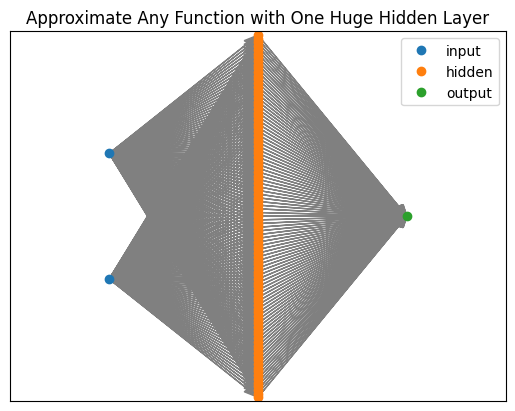

In [ ]:
input_x = 20
hidden_x = 50
output_x = 80

input_ys = [33, 67]
hidden_ys = range(1, 100, 1)
output_ys = [50]

plot_fully_connected(input_x, input_ys, hidden_x, hidden_ys)
plot_fully_connected(hidden_x, hidden_ys, output_x, output_ys)

plot_nodes(input_x, input_ys, "input")
plot_nodes(hidden_x, hidden_ys, "hidden")
plot_nodes(output_x, output_ys, "output")

plt.title("Approximate Any Function with One Huge Hidden Layer")
finish_network()

## Matrix Multiplication in Neural Networks


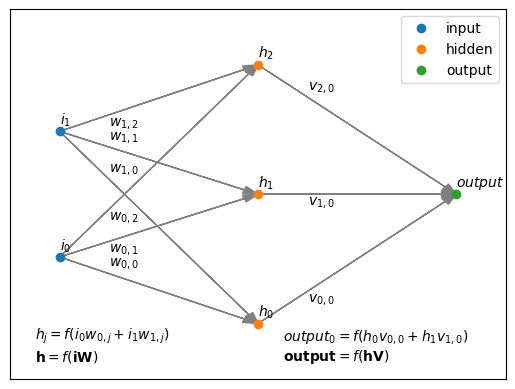

In [ ]:
input_x = 10
hidden_x = 50
output_x = 90

input_ys = [33, 67]
hidden_ys = range(15, 86, 35)
output_ys = [50]

plot_fully_connected(input_x, input_ys, hidden_x, hidden_ys, "$w_{{{0},{1}}}$")
plot_fully_connected(hidden_x, hidden_ys, output_x, output_ys, "$v_{{{0},{1}}}$")

plot_nodes(input_x, input_ys, "input", "$i_{0}$")
plot_nodes(hidden_x, hidden_ys, "hidden", "$h_{0}$")
plot_nodes(output_x, output_ys, "output", "$output$")

plt.annotate("$h_{j} = f(i_0 w_{0,j} + i_1 w_{1,j})$\n$\\mathbf{h}=f(\\mathbf{i} \\mathbf{W})$", (5, 5))
plt.annotate("$output_0 = f(h_0 v_{0,0} + h_1 v_{1,0})$\n$\\mathbf{output} = f(\\mathbf{h} \\mathbf{V})$", (55, 5))

finish_network()

## Matrix Multiplication for One Neuron

\begin{array}{rcl}
o_{i,j} & = &
f\left(
    \begin{bmatrix}
    o_{i-1,0} &
    \ldots &
    o_{i-1,n-1} \\
    \end{bmatrix}
    \begin{bmatrix}
    w_{0,j} \\
    w_{1,j} \\
    \ldots \\
    w_{n-1,j} \\
    \end{bmatrix}
    \right) \\
\end{array}

$f$ is the activation function of the neuron.

## Matrix Multiplication for One Layer

\begin{array}{rcl}
\begin{bmatrix}
x_{i,0} & \ldots & x_{i,n-1} \\
\end{bmatrix}
& = &
f\left(
    \begin{bmatrix}
    x_{i-1,0} &
    \ldots &
    x_{i-1,n-1} \\
    \end{bmatrix}
    \begin{bmatrix}
    w_{0,0} & \ldots & w_{0,n-1} \\
    w_{1,0} & \ldots & w_{0,n-1} \\
    \ldots \\
    w_{n-1,0} & \ldots & w_{n-1,n-1} \\
    \end{bmatrix}
    \right) \\
\end{array}

Activation function $f$ is applied element-wise to the output of the matrix multiplication.

## Neural Networks Oversimplified

\begin{array}{rcl}
\mathbf{x_0} & = & \mathbf{X} \\
\mathbf{x_1} & = & f(\mathbf{x_1 W_1} + \mathbf{b_1}) \\
\mathbf{x_2} & = & f(\mathbf{x_2 W_2} + \mathbf{b_2}) \\
\mathbf{x_3} & = & f(\mathbf{x_3 W_3} + \mathbf{b_3}) \\
...
\end{array}

## Matrix Multiplication as an Information Bottleneck

Information in the inputs might be lost when multiplying by an $m \times n$ matrix $\mathbf{W}$ if
* $n < m$
* $\mathbf{W}$ is low rank
* $\mathbf{W}$ is not invertible

